In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import animation
import numpy as np
from math import sin , cos, pi
from tqdm import tqdm


In [21]:
!pip3 install numba # zur Beschleunigung
import numba as nb
from numba import jit


# Funktions für Vektorrechnung E 

In [10]:
def E2(q1,q2, r, x, y):# nur für 2 Ladungen
    l=1
    k=9*10**9
    v2=(k*q1)/(((x+r/2)**2+(y)**2))
    v3=(k*q2)/(((x-r/2)**2+(y)**2)) 
    x2=((x+r/2))*(v2/(((r/2+x)**2+(y)**2)**0.5))
    y2=y*(v2/(((r/2+x)**2+(y)**2)**0.5))

    x3=(x-r/2)*(v3/(((x-r/2)**2+(y)**2)**0.5))
    y3=y*(v3/(((r/2-x)**2+(y)**2)**0.5))

    x1=(x2+x3)*l
    y1=(y2+y3)*l
    v1=((x1**2+y1**2)**0.5)
  
    
    
    return x1/v1, y1/v1 # oder nur x1, y1 für dynamische Längen der Pfeilen

def E1(q_prop, xs, ys): # für n Ladungen
    l=1
    k=9*10**9
    dx=0
    dy=0
    c=0
    for c in range(len(q_prop)):
      q=q_prop[c]
      r=((xs-q[0])**2+(ys-q[1])**2)**0.5
      v=(k*q[2])/r**2
      x=(xs-q[0])*(v/r)
      y=(ys-q[1])*(v/r)

      dx+=x
      dy+=y
    
    
    return np.array([dx, dy])

# Primitive Feldszeichnung

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


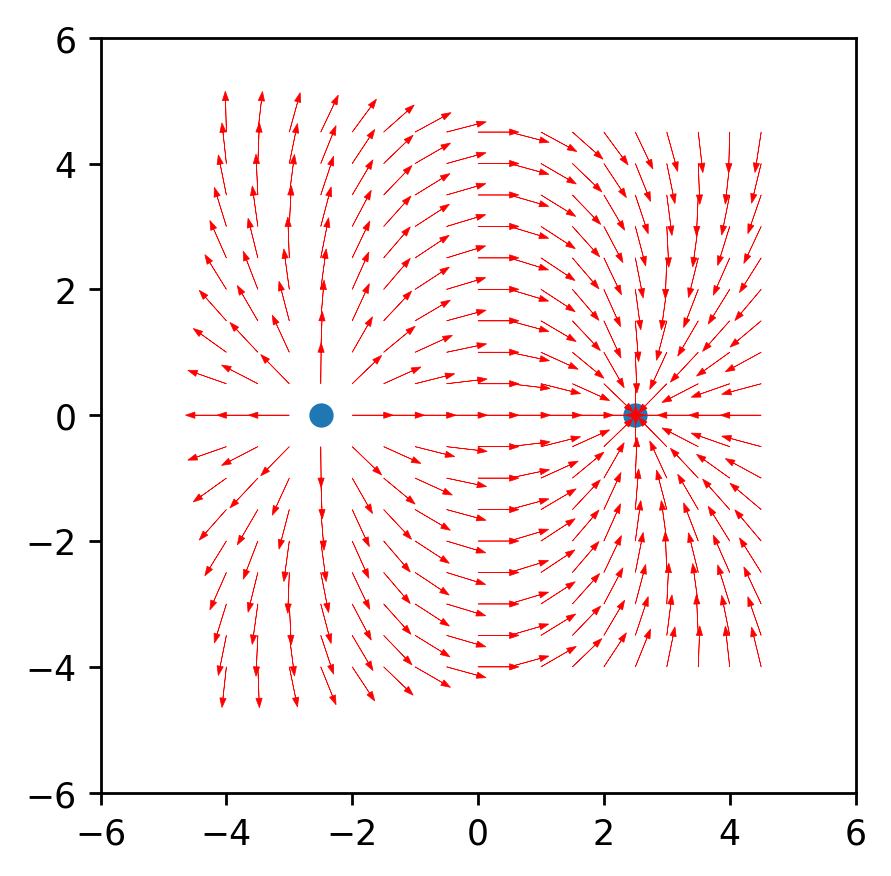

In [12]:
size=4
qual=0.5
gr=np.mgrid[-size:(size+1):qual, -size:(size+1):qual]
xg, yg = np.array(gr[0]).reshape(-1), np.array(gr[1]).reshape(-1)

q1 = 1*10**(-10)
q2 = -1*10**(-10)
r  = 5
size=5
plt.figure(dpi=250)
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter([-r/2,r/2],[0,0])
E=0
n=30

for x, y in zip(xg, yg):
    
    x1, y1 = E2(q1,q2,r,x,y)

    plt.scatter([x,x1+x],[y,y1+y],s=0, c='w')

    plt.arrow(x,y,x1*0.5,y1*0.5, color='r',head_width=0.1, linewidth=0.2)
plt.show()

# Version nur für 2 Ladungen mit Entfernung r dazwischen

30it [00:00, 258.02it/s]


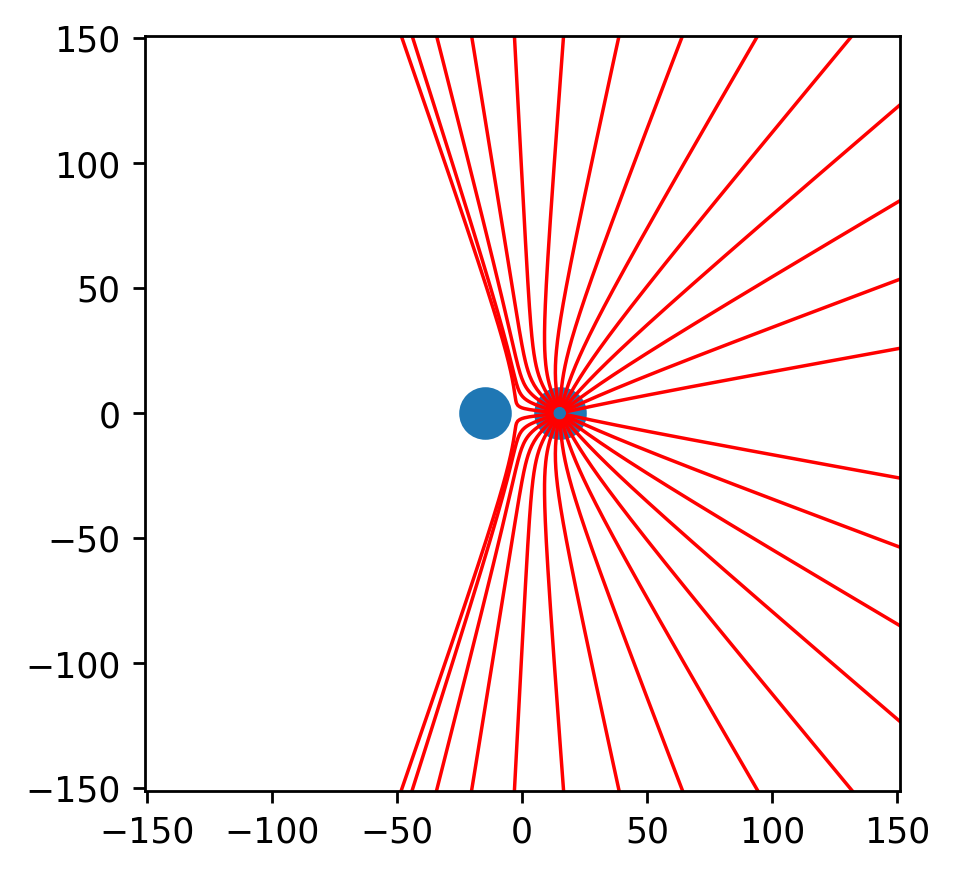

In [17]:
q1 = 10**(-7)
q2 = 2*10**(-7)
r  = 30 # dist of qs
size = 150 # size of plot
plt.figure(dpi=250)
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))

plt.gca().set_aspect('equal', adjustable='box')
n=30 # line's num

theta = np.linspace(0, 2*np.pi, n)

r_q = np.sqrt(5)

x11 = r_q*np.cos(theta)+r/2
x22 = r_q*np.sin(theta)

for x0, y0 in tqdm(zip(x11, x22)):

  if abs(y0)>0.01:

    lines=[[],[]]

    E=E2(q1,q2,r,x0,y0)
    x1, y1 = E
    c=0

    while  ((y0-0.1)**2+(x0+r/2)**2)**0.5 > r_q  and abs(x0)<size+2 and abs(y0)<size+2: 

      E=E2(q1,q2,r,x0,y0)
      x1, y1 = E

      x0+=x1
      y0+=y1
      lines[0].append([x0])
      lines[1].append([y0])      
      c+=1
      
    plt.plot(lines[0],lines[1], c="r", linewidth=1)

plt.scatter([-r/2,r/2],[0,0], s=200)

plt.show()


# Ohne Beschleunigung für mehr als 2 Ladungen(keine Optimierung)

10it [00:18,  1.89s/it]
10it [00:17,  1.79s/it]
10it [00:18,  1.84s/it]


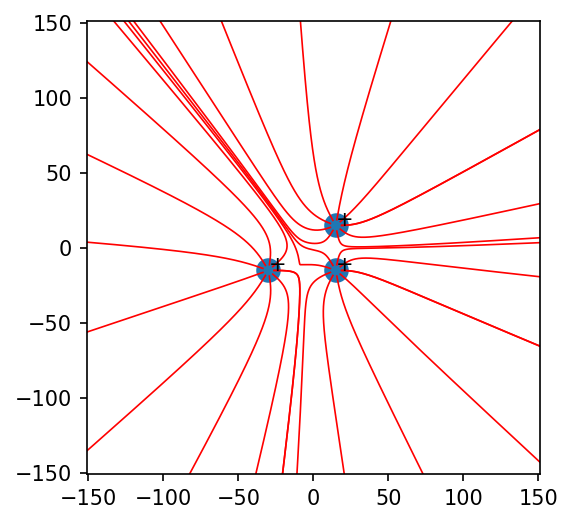

CPU times: user 55.3 s, sys: 206 ms, total: 55.5 s
Wall time: 55.6 s


In [18]:
%%time
size = 150 # size of plot
plt.figure(dpi=150)
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))
kof=0.001
q_prop=np.array([[-30, -15, 10**(-9),1],[15, -15, 10**(-9),1],[15, 15, 10**(-9),1]])
wind=np.zeros(int(2*np.pi*10))
#q_prop=np.array([[-150000000*kof, 700000*kof, 50*10**(-9),0], [-150000000*kof, -700000*kof, -50*10**(-9),0], [0*kof, 6400*kof, 2*10**(-9),1],[0*kof, -6400*kof, -2*10**(-9),1]])

n=10 # lines num

r_q = np.sqrt(15)
plt.gca().set_aspect('equal', adjustable='box')
theta = np.linspace(0, 2*np.pi, n)
mask=q_prop[ q_prop[:,2]>0 ][ q_prop[q_prop[:,2]>0][:,3]==1 ]
for cq, q in enumerate(mask):
  x11 = r_q*np.cos(theta)+q[0]
  x22 = r_q*np.sin(theta)+q[1]
  for xs, ys in tqdm(zip(x11, x22)):
    lines=[[],[]]
    
    stop=0
    
    lines[0].append(xs)
    lines[1].append(ys)      
    while  abs(xs)<size+2 and abs(ys)<size+2: 
      for cq1, q in enumerate(q_prop):
        if ((ys-q[1])**2+(xs-q[0])**2)**0.5<r_q/2 :#and cq1!=cq
          stop=1
          break
      if stop==1:
        break
      dx, dy = E1(q_prop,xs,ys)

      xs+=dx
      ys+=dy
      lines[0].append(xs)
      lines[1].append(ys)      
      
    plt.plot(lines[0],lines[1], c="r", linewidth=0.8)

plt.scatter(q_prop[:,0],q_prop[:,1], s=r_q*30)
for q in q_prop:
  if q[2]>0:
    plt.text(q[0], q[1], "+", fontsize=10)
  else:
    plt.text(q[0], q[1], "-", fontsize=20)


plt.show()


# Mit Beschleunigung 
## Для более чем двух зарядов в произвольных координатах, оптимизированно


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs


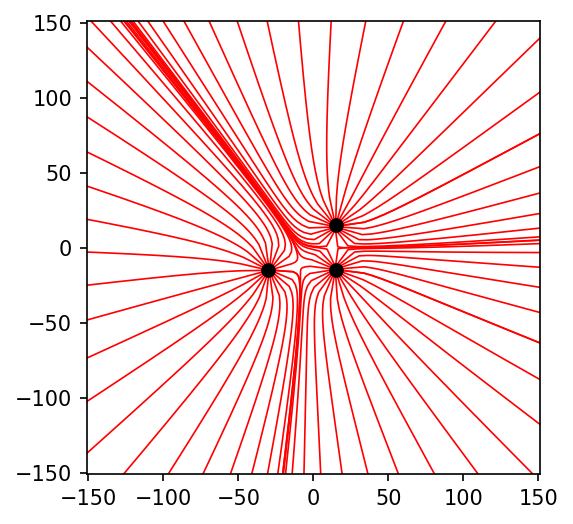

In [23]:
%time
q_prop=np.array([[-30, -15, 10**(-9),1],[15, -15, 10**(-9),1],[15, 15, 10**(-9),1]]).astype(np.float32)# [xq,yq,q,1] 0 staat 1, wenn sie nicht die Linien von diesem Laden rechnen  
r_q = np.sqrt(20)
size = 150 #size of plot
n=25

@nb.jit()
def E1(q_prop, xs, ys):
    l=10
    k=9*10**9
    dx=0
    dy=0
    c=0
    for c in range(len(q_prop)):
      q=q_prop[c]
      r=((xs-q[0])**2+(ys-q[1])**2)**0.5
      v=(k*q[2])/r**2
      x=(xs-q[0])*(v/r)*l#*(v/r)
      y=(ys-q[1])*(v/r)*l

      dx+=x
      dy+=y
    
    
    return dx, dy
  
@nb.jit()
def Draw(size, q_prop,r_q, n):
  
  linen=np.empty((np.count_nonzero(q_prop[:,2]>0),n, 2000000), dtype=np.float64)
  linen[:] = np.nan
  theta = np.linspace(0, 2*np.pi, n)
  mask=q_prop[ q_prop[:,2]>0 ][ q_prop[q_prop[:,2]>0][:,3]==1 ]
  for cq in range(len(mask)):
    qmask=mask[cq]
    x11 = r_q*np.cos(theta)+qmask[0]
    x22 = r_q*np.sin(theta)+qmask[1]
    for c in range(len(x11)):

      xs=x11[c]
      ys=x22[c]

      lines=np.empty((2,1000000), dtype=np.float64)
      lines[:]=np.nan
      stop=0
      nnn=0
      
      lines[0][nnn]=xs
      lines[1][nnn]=ys
      while  abs(xs)<size+2 and abs(ys)<size+2: 
        nnn+=1

        for cq1 in range(len(q_prop)):
          q=q_prop[cq1]
          if ((ys-q[1])**2+(xs-q[0])**2)**0.5<r_q/2 :
            stop=1
            break
        if stop==1:
          break
        dx, dy = E1(q_prop,xs,ys)

        xs+=dx
        ys+=dy
        lines[0][nnn]=xs
        lines[1][nnn]=ys
       
      linen[cq,c,:]=lines.reshape(-1)

  return linen 



def Plot_im(size,q_prop,r_q, n):
  lines=Draw(size,q_prop,r_q, n)

  plt.figure(dpi=150)

  plt.xlim(-(size+1), (size+1))
  plt.ylim(-(size+1), (size+1))
  plt.gca().set_aspect('equal', adjustable='box')
  for qq in lines:
    for l in qq:

      l=l[l!=np.nan].reshape(2,-1)
      plt.plot(l[0][::20],l[1][::20], linewidth=0.8,c="r")


  plt.plot(q_prop[:,0],q_prop[:,1],"bo" , c="black" )

Plot_im(size,q_prop,r_q,n)
plt.savefig("1.png",)
plt.show()


# 3D  ist nicht noch fertig

<timed exec>:26: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "Draw" failed type inference due to: Use of unsupported NumPy function 'numpy.mgrid' or unsupported use of the function.

File "<timed exec>", line 38:
<source missing, REPL/exec in use?>

During: typing of get attribute at <timed exec> (38)

File "<timed exec>", line 38:
<source missing, REPL/exec in use?>

<timed exec>:26: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "Draw" failed type inference due to: cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<timed exec>", line 35:
<source missing, REPL/exec in use?>

/usr/local/lib/python3.7/dist-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "Draw" was compiled in object mode without forceobj=True, but has lifted loops.

File "<timed exec>", line 29:
<source missing, REPL/exec in use?>

  state.func_ir.loc))
/usr

CPU times: user 5.56 s, sys: 219 ms, total: 5.78 s
Wall time: 5.64 s
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ff100d85950> (for post_execute):


UFuncTypeError: ignored

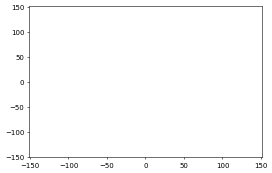

UFuncTypeError: ignored

<Figure size 432x288 with 1 Axes>

In [25]:
%%time
q_prop=np.array([[-30, -15,-15, 10**(-9),1],[15, -15, 15, 10**(-9),1],[15, 15,50, 10**(-9),1]])# [xq,yq,q,1] 0 staat 1, wenn sie nicht die Linien von diesem Laden rechnen  


@nb.jit()
def E1(q_prop, xs, ys, zs):
    l=10
    k=9*10**9
    dx=0
    dy=0
    dz=0
    c=0
    for c in range(len(q_prop)):
      q=q_prop[c]
      r=((xs-q[0])**2+(ys-q[1])**2+(zs-q[2])**2)**0.5
      v=(k*q[2])/r**2
      x=(xs-q[0])*(v/r)*l#*(v/r)
      y=(ys-q[1])*(v/r)*l
      z=(zs-q[2])*(v/r)*l

      dx+=x
      dy+=y
      dz+=z
    
    
    return dx, dy, dz
@nb.jit()#nopython=True)
def Draw(size, q_prop,r_q):
  
  linen=np.empty((np.count_nonzero(q_prop[:,2]>0),n, 2000000), dtype=np.float64)
  linen[:] = np.nan
  


  mask=q_prop[ q_prop[:,2]>0 ][ q_prop[q_prop[:,2]>0][:,3]==1 ]
  for cq in range(len(mask)):
    qmask=mask[cq]

    pof=np.mgrid[0.0:np.pi:10j, 0.0:2.0*np.pi:10j]
    phi, theta = pof
    xc = r_q*np.sin(phi)*np.cos(theta)+qmask[0]
    yc = r_q*np.sin(phi)*np.sin(theta)+qmask[1]
    zc = r_q*np.cos(phi)+qmask[2]

    for c in range(len(xc)):

      xs=xc[c]
      ys=yc[c]
      zs=zc[c]

      lines=np.empty((3,1000000), dtype=np.float64)
      lines[:]=np.nan
      stop=0
      nnn=0
      
      while  abs(xs)<size+2 and abs(ys)<size+2: 
        for cq1 in range(len(q_prop)):
          q=q_prop[cq1]
          if (((xs-q[0])**2+ys-q[1])**2+(zs-q[2])**2)**0.5<r_q/2: # and cq1!=cq
            stop=1
            break
        if stop==1:
          break
        dx, dy, dz = E1(q_prop,xs,ys)

        xs+=dx
        ys+=dy
        zs+=dz

        lines[0][nnn]=xs
        lines[1][nnn]=ys
        lines[2][nnn]=zs

        nnn+=1
       
      linen[cq,c,:]=lines.reshape(-1)

  return linen 


size = 150 # size of plot
plt.figure(dpi=50)
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))
r_q = np.sqrt(20)


fig = plt.figure()
ax = fig.gca(projection='3d')
lines=Draw(size,q_prop,r_q)

for qq in lines:
 for l in qq:

   l=l[l!=np.nan].reshape(2,-1)
   ax.plot(l[0][::20],l[1][::20], c="r", linewidth=0.8)

ax.scatter(q_prop[:,0],q_prop[:,1], s=r_q*30)
for q in q_prop:
  if q[2]>0:
    ax.text(q[0], q[1], "+", s=10)
  else:
    ax.text(q[0], q[1], "-", s=20)



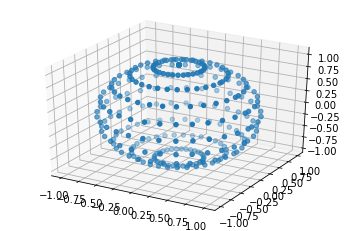

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

r = 1

#phi, theta = np.mgrid[0.0:pi:100, 0.0:2.0*pi:100]
n=20
phi, theta = np.mgrid[0.0:np.pi:(2*np.pi*r)/n, 0.0:2.0*np.pi:0.2]
x = r*np.sin(phi)*np.cos(theta)
y = r*np.sin(phi)*np.sin(theta)
z = r*np.cos(phi)


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(x,y,z)
plt.show()

# GIF Herstellung

0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


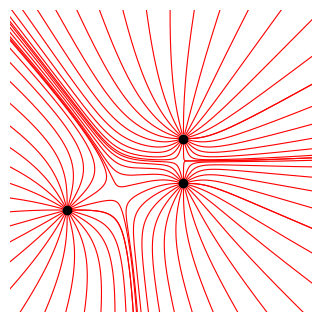

In [27]:
q_prop = np.array([[-70, -40, 10**(-9),1],[15, -15, 10**(-9),1],[15, 15, 10**(-9),1]]).astype(np.float32)# [xq,yq,q,1] 0 staat 1, wenn sie nicht die Linien von diesem Laden rechnen  
r_q = np.sqrt(10)
size = 100 # size of plot
n = 25 #n lines
N = 30 # n frames in video

@nb.jit()
def E1(q_prop, xs, ys):
    l=0.1
    k=9*10**9
    dx=0
    dy=0
    c=0
    for c in range(len(q_prop)):
      q=q_prop[c]
      r=((xs-q[0])**2+(ys-q[1])**2)**0.5
      v=(k*q[2])/r**2
      x=(xs-q[0])*(v/r)*l
      y=(ys-q[1])*(v/r)*l

      dx+=x
      dy+=y
    
    
    return dx, dy
@nb.jit()
def Draw(size, q_prop,r_q, n):
  
  linen=np.empty((np.count_nonzero(q_prop[:,2]>0),n, 2000000), dtype=np.float64)
  linen[:] = np.nan
  theta = np.linspace(0, 2*np.pi, n)
  mask=q_prop[ q_prop[:,2]>0 ][ q_prop[q_prop[:,2]>0][:,3]==1 ]
  for cq in range(len(mask)):
    qmask=mask[cq]
    x11 = r_q*np.cos(theta)+qmask[0]
    x22 = r_q*np.sin(theta)+qmask[1]
    for c in range(len(x11)):

      xs=x11[c]
      ys=x22[c]

      lines=np.empty((2,1000000), dtype=np.float64)
      lines[:]=np.nan
      stop=0
      nnn=0
      lines[0][nnn]=xs
      lines[1][nnn]=ys
      while  abs(xs)<size+2 and abs(ys)<size+2:
        nnn+=1
        for cq1 in range(len(q_prop)):
          q=q_prop[cq1]
          if ((ys-q[1])**2+(xs-q[0])**2)**0.5<r_q/2 :
            stop=1
            break
        if stop==1:
          break
        dx, dy = E1(q_prop,xs,ys)

        xs+=dx
        ys+=dy
        lines[0][nnn]=xs
        lines[1][nnn]=ys
       
      linen[cq,c,:]=lines.reshape(-1)

  return linen 


fig = plt.figure(dpi=100)
ax = plt.axes()
ax.set_axis_off()
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))
plt.gca().set_aspect('equal', adjustable='box')
a_lines=[]
points=[]

lines=Draw(size,q_prop,r_q, n)
for index in range(lines.shape[0]*lines.shape[1]):
    a_lines.append(plt.plot([],[],ls="-", lw=0.8, c="r")[0])
points.append(plt.plot([],[],"bo" , c="black" )[0])


def Plot_im(size,q_prop,r_q, n):

  lines=Draw(size,q_prop,r_q, n)
  c=0
  for qq in lines:
    for l in qq:
      l=l[l!=np.nan].reshape(2,-1)
      a_lines[c].set_data(l[0], l[1])
      c+=1

  points[0].set_data(q_prop[:,0],q_prop[:,1])
  return a_lines+points
  
def animate(x):
    print(x)
    q_prop[0][0]+=x/60
    q_prop[0][1]+=x/60

    return Plot_im(size,q_prop,r_q, n)
      
def init():
      lobj = plt.plot([],[], lw=0.8, c="r")[0]
      return lobj,

anim = animation.FuncAnimation(fig, animate, frames=N, interval=20, blit=True)
anim.save('Ohne Stoßen.gif', writer='pillow', fps=30)
plt.show()

# Sonnensystemmodel


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
59010.81035902995
35277.241711383766
30297.54058777193
26487.295235303594


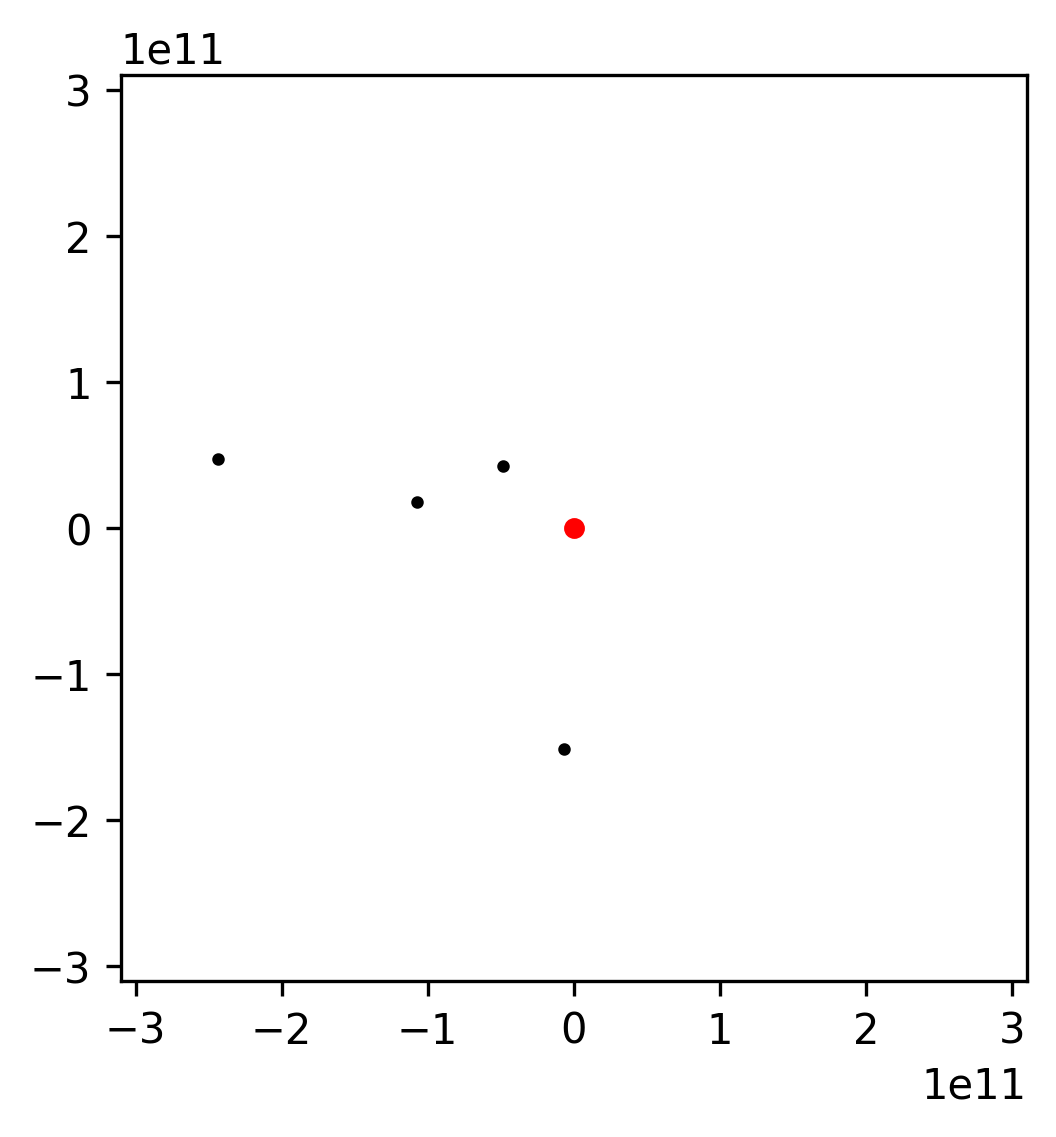

2.3148148148148148e-06


In [28]:
%time
ae=149.6*10**9


def V(a,e):
  m=1.99*10**30 
  G=6.67*10**-11
  print(((G*m)/a*((1+e)/(1-e)))**0.5)
  return a*(1-e), ((G*m)/a*((1+e)/(1-e)))**0.5

Sonne=  [0       , 0, 1.99*10**30     , 0, 0, 0]
Merkur= [0.387*ae, 0, 3.33*10**23  , 0, 1, 0.206]
Venus=  [0.723*ae, 0, 4.87*10**24  , 0, 1, 0.007]
Erde=   [1*ae    , 0, 5.97*10**24  , 0, 1, 0.017]
Mars=   [1.524*ae, 0, 6.42*10**23  , 0, 1, 0.093]
Jupiter=[5.204*ae, 0, 1.90*10**27  , 0, 1, 0.048]
Saturn= [9.582*ae, 0, 5.68*10**26  , 0, 1, 0.056]
Uran=   [19.23*ae, 0, 8.68*10**25  , 0, 1, 0.044]
Neptun= [30.06*ae, 0, 1.02*10**26  , 0, 1, 0.011]

q_prop = np.array([Sonne,Merkur, Venus, Erde, Mars])#, Jupiter])#, Saturn, Uran, Neptun])# [[xq1, yq1, mq1, vxq1, vyq1], [xq2, yq2, mq2, vxq2, vyq2] ... ] 

for c, planet in enumerate(q_prop[1:]):
  q, v=V(planet[0], planet[5])
  q_prop[c+1][4]*=v
  q_prop[c+1][0]=q
  
size = max(q_prop[:,0])*1.5 # size of plot

N = 1000 # n frames
dt=3600*24

# Funtion für Beschleunigungsberechnung
@nb.jit()
def g(q_prop, xs, ys, nq):
    G=6.67*10**-11
    gx=0
    gy=0
    c=0
    for c in range(len(q_prop)):
        if c!=nq:
            Objekt=q_prop[c]
            
            r=((xs-Objekt[0])**2+(ys-Objekt[1])**2)**0.5
            dgv=-(G*Objekt[2])/(r**2)
            dgx=(xs-Objekt[0])*(dgv/r)
            dgy=(ys-Objekt[1])*(dgv/r)

            gx+=dgx
            gy+=dgy
    return gx, gy


@nb.jit()
def Update_all(q_prop):
  vx=0
  vy=0
  x=0
  y=0
  q_prop_1=np.copy(q_prop)
  for c in range(len(q_prop)):
    xs=q_prop[c][0]
    ys=q_prop[c][1]
    m =q_prop[c][2]
    vx=q_prop[c][3]
    vy=q_prop[c][4]
    gx, gy= g(q_prop, xs, ys, c)

    x = gx*dt**2 + vx*dt + xs
    y = gy*dt**2 + vy*dt + ys
    vx+=gx*dt
    vy+=gy*dt

    q_prop_1[c]=[x,y,m,vx,vy, 0]
  
  return q_prop_1



fig = plt.figure(dpi=300)
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))
plt.gca().set_aspect('equal', adjustable='box')

points=[]

q_prop=Update_all(q_prop)

points.append(plt.plot([],[],"bo", c="r",markersize=4 )[0])
points.append(plt.plot([],[],"bo",markersize=2, c="black" )[0])

def Plot_im(size):
  global q_prop
  global lines
  q_prop=Update_all(q_prop)
  points[0].set_data(q_prop[0,0],q_prop[0,1])

  points[1].set_data(q_prop[1:,0],q_prop[1:,1])
  return points
  
def animate(x):
    global q_prop
    return Plot_im(size)
      
def init():
      lobj = plt.plot([],[], lw=0.8, c="r")[0]
      return lobj,

anim = animation.FuncAnimation(fig, animate, frames=N, interval=200, blit=True)
anim.save('Sonnensystem.gif', writer='pillow', fps=30)
plt.show()
print(0.2/dt)